# 03 - Noise Management (ClusterCentroids)

ClusterCentroids:
1. Uses clustering algorithms (default is KMeans) to identify representative samples of the majority class.
2. This reduces the number of majority class samples, balancing the dataset

In [4]:
import pandas as pd
from imblearn.under_sampling import ClusterCentroids
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv("bank_numeric.csv")

In [6]:
# separate features (X) and target (y)
# Assuming the target column is named 'target'
X = df.drop(columns=['deposit'])
y = df['deposit']

In [7]:
# check original class distribution
print("Original class distribution:", dict(zip(*np.unique(y, return_counts=True))))


NameError: name 'np' is not defined

In [ ]:
# apply ClusterCentroids
cc = ClusterCentroids(random_state=42)
X_resampled, y_resampled = cc.fit_resample(X, y)


In [ ]:
# check resampled class distribution
print("Resampled class distribution:", dict(zip(*np.unique(y_resampled, return_counts=True))))


Resampled class distribution: {0: 2113, 1: 2113}


In [ ]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


In [ ]:
# train a Logistic Regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

C:\Users\e1003118\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
#make predictions
predictions = logreg.predict(X_test)

In [ ]:
# print the classification report based on true values and predictions
print(classification_report(y_test, predictions))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       655
           1       0.79      0.77      0.78       613

    accuracy                           0.79      1268
   macro avg       0.79      0.79      0.79      1268
weighted avg       0.79      0.79      0.79      1268


Model overall accuracy: 79.18%


In [ ]:
# True Negative (TN) - False Positive (FP)
# False Negative (FN) - True Positive (TP)
print(confusion_matrix(y_test, predictions))

[[529 126]
 [138 475]]


results without distribution  
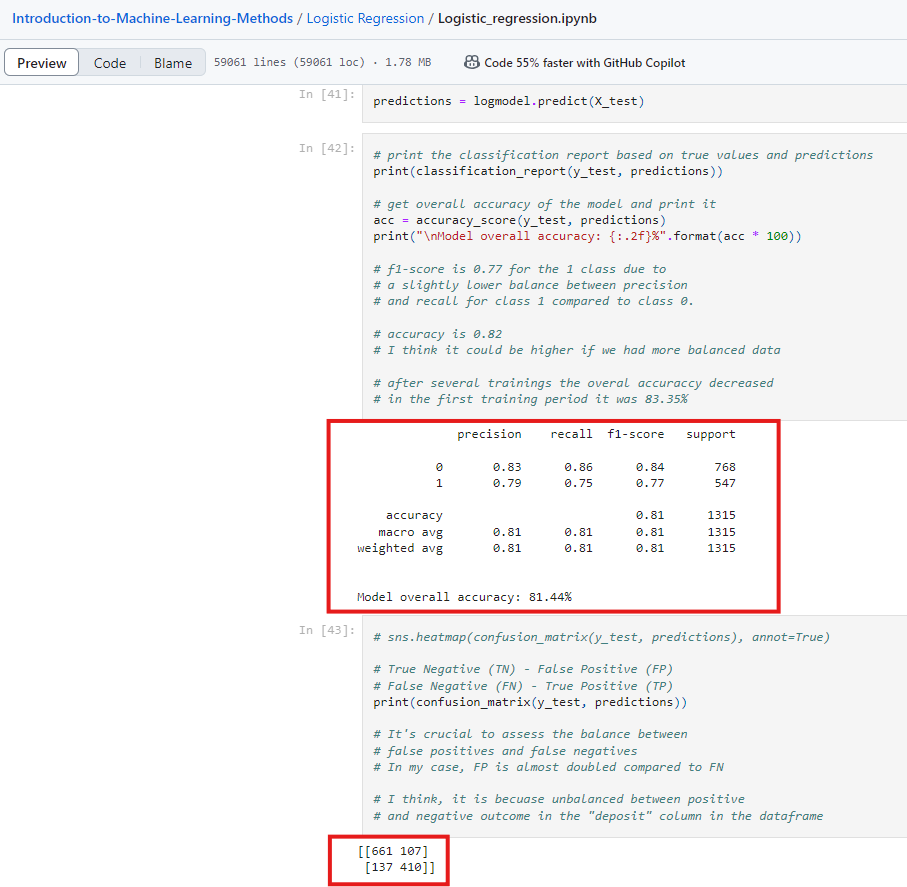

In [ ]:
# we can see that results before distribution were better